   # EDA 프로젝트  
                      FAST CAMPUS DataSceince School Fit

<br>

## 주제 : 다이아몬드의 가격 결정 요인 분석 및 지표 결정


<br>

#### Table of Content

- 1. Data Handling
    - 1.1 데이터 확인
    - 1.2 가설 설정
    - 1.3 가설 확인 (데이터 분석)
 
- 2. Categorical Data 
    - 2.1 cut
    - 2.2 clarity
    - 2.3 color
- 3.  결론도출
- 4.  선형회귀 분석
    - 4.1 one hot encoding
    - 4.2 Linear Regession
   


<br>

### 1. Data Handling

#### 1. 1 데이터 확인

In [1]:
# 데이터 읽기 / 불러오기
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# 결측치 확인
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


- 데이터 갯수 : 53940
- 컬럼 개수 : 10
- null 데이터 없음
- 3개의 범주형 데이터와 7개의 수치형 데이터

In [3]:
# 이상치 확인
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- x, y, z에 0 값 존재 
- x, y, z의 min, max 값 적절성 판단
- price 분포 파악 필요성

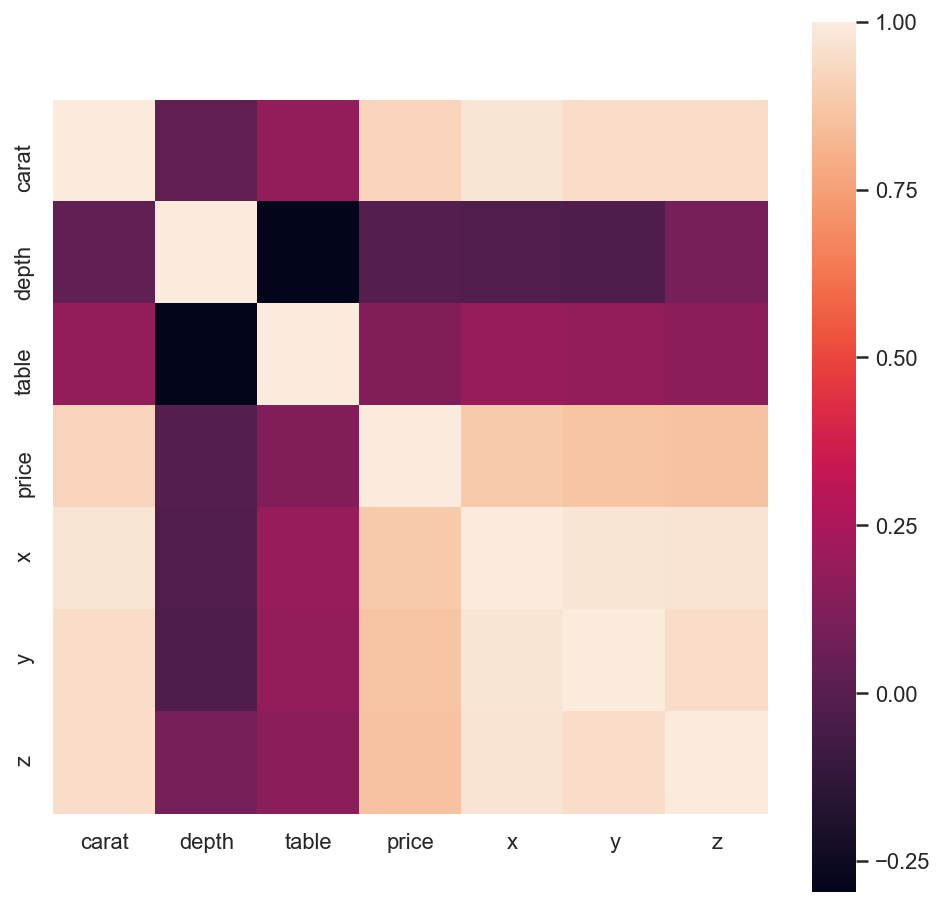

In [4]:
# 상관관계 파악
plt.figure(figsize=(8, 8))
sns.heatmap(diamonds.corr(), square=True)
plt.show()

- x, y, z의 상관관계 매우 높음
- depth, table의 상관관계 매우 낮음
- carat과 x, y, z의 관계 파악 필요

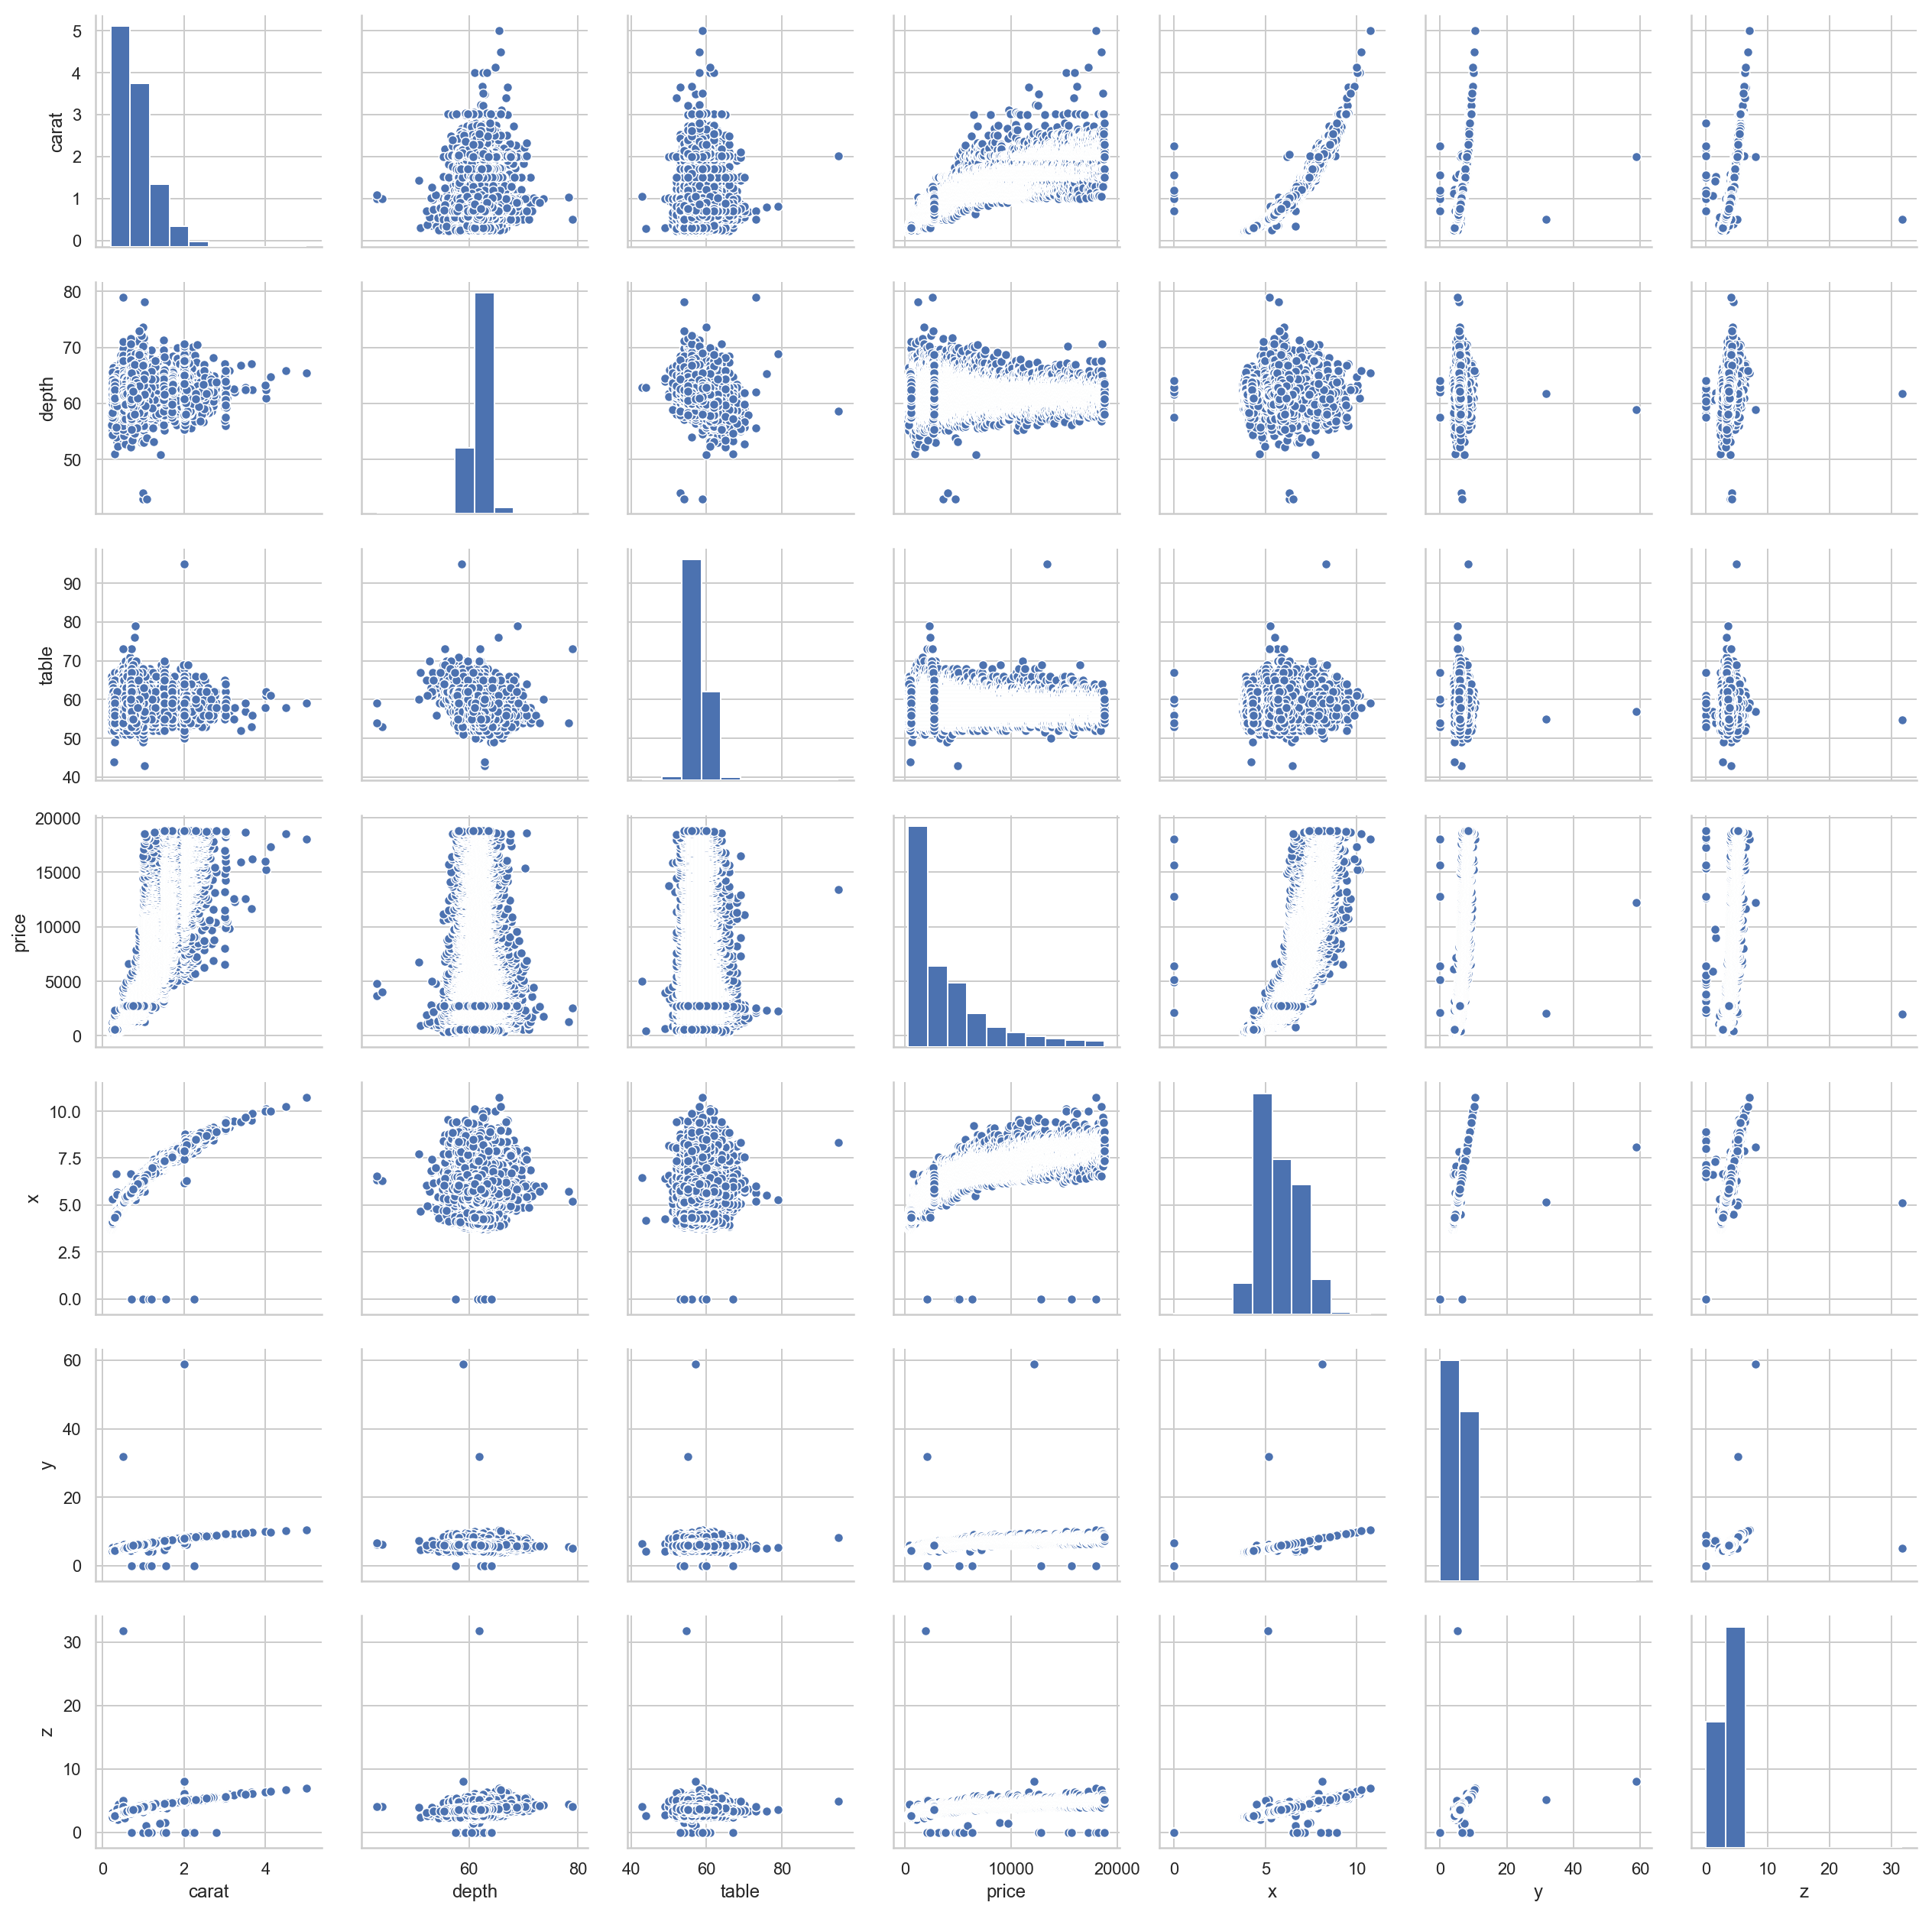

In [5]:
sns.pairplot(diamonds)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


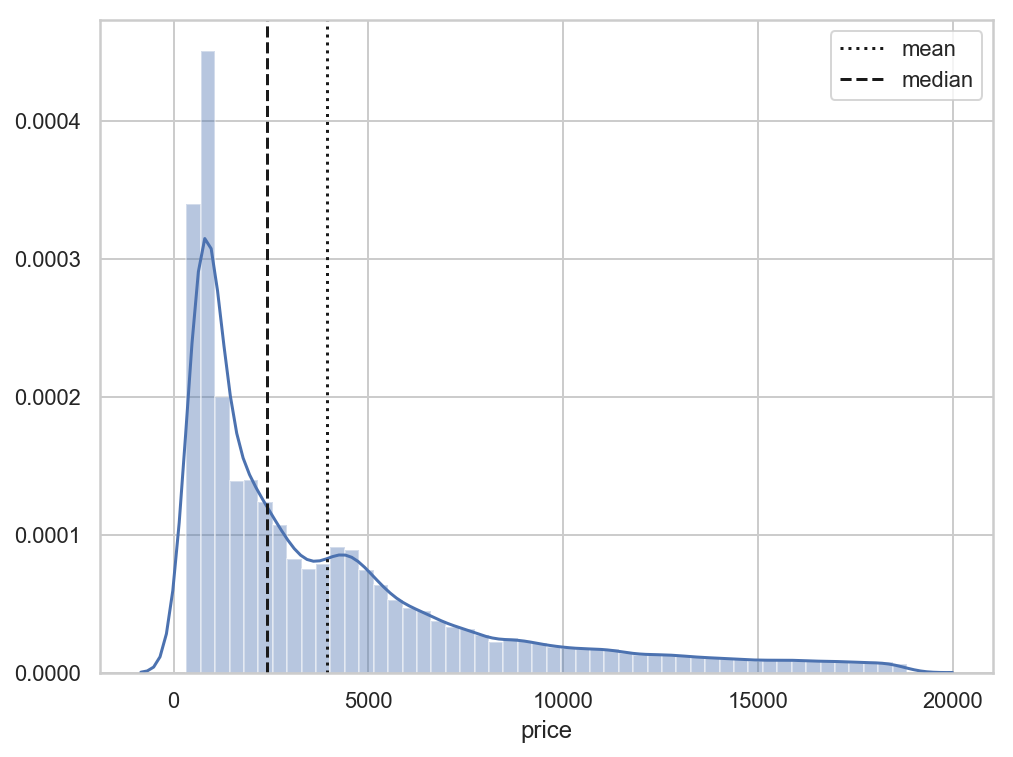

In [6]:
# price 분포 파악
plt.figure(figsize=(8, 6))
sns.distplot(diamonds["price"])
plt.axvline(np.mean(diamonds["price"]), c='k', ls=":", label="mean")
plt.axvline(np.median(diamonds["price"]), c='k', ls="--", label="median")
plt.legend()
plt.show()

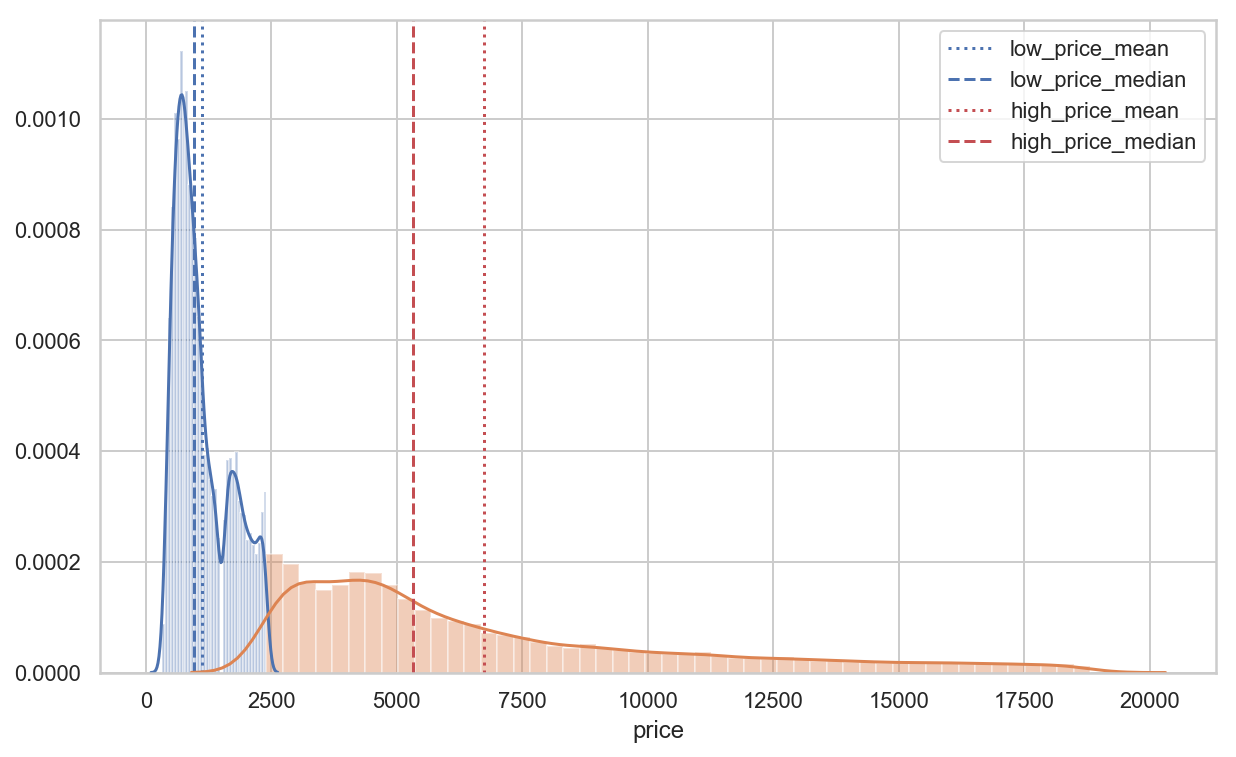

In [7]:
# 중간값을 기준으로 고가/저가 가격으로 분류
high_price = diamonds[diamonds["price"]>2400]
low_price = diamonds[diamonds["price"]<=2400]

plt.figure(figsize=(10, 6))
sns.distplot(low_price["price"])
plt.axvline(np.mean(low_price["price"]), c='b', ls=":", label="low_price_mean")
plt.axvline(np.median(low_price["price"]), c='b', ls="--", label="low_price_median")
plt.legend()
sns.distplot(high_price["price"])
plt.axvline(np.mean(high_price["price"]), c='r', ls=":", label="high_price_mean")
plt.axvline(np.median(high_price["price"]), c='r', ls="--", label="high_price_median")
plt.legend()
plt.show()

#### 1.2 가설설정
    1)  고가 - 저가 다이아몬드의 분포가 다를 것이다.
    2)  depth, table은 price와 관계 없을 것이다.
    3)  x, y, z은 다이아몬드의 크기와 관계있을 것이다.
    4)  carat이 클 수록 price가 높을 것이다.
    5)  cut, clarity, color별 price 순차적 등급이 존재할 것이다.
    
   

<br>

#### 1.3 가설확인

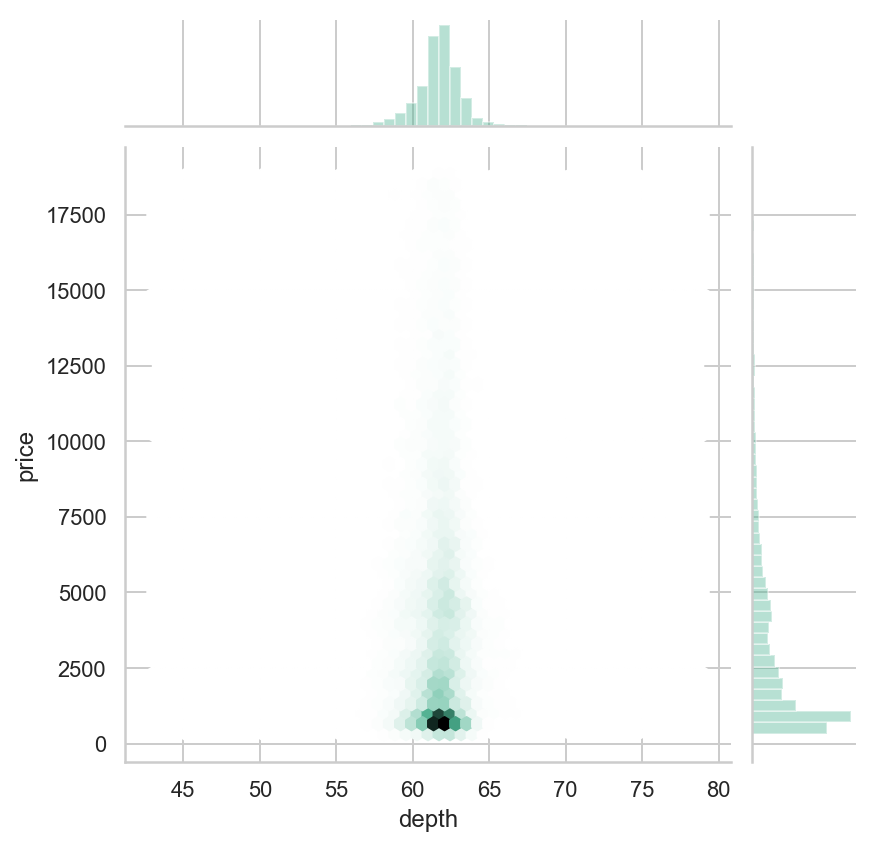

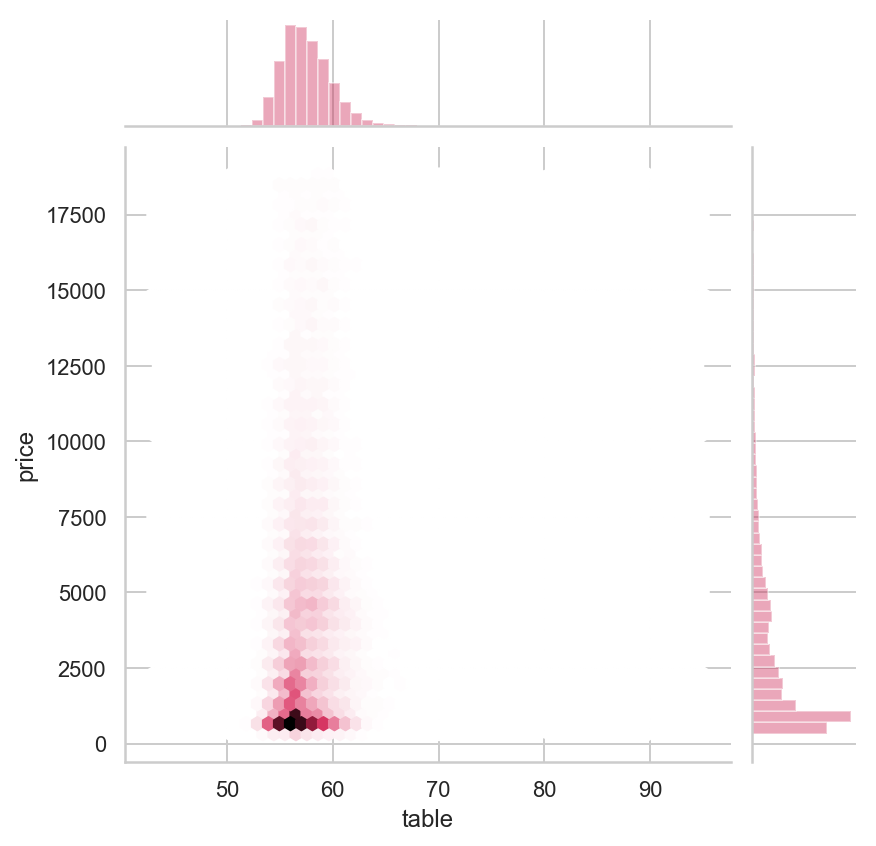

In [8]:
# depth, table과 price관계 분석
sns.jointplot("depth", "price", data=diamonds, kind="hex", color="#4CB391")
sns.jointplot("table", "price", data=diamonds, kind="hex", color="#CB2553")

In [9]:
np.corrcoef(diamonds["depth"], diamonds["price"])[1,0],np.corrcoef(diamonds["table"], diamonds["price"])[1,0]

(-0.010647404584142992, 0.1271339021217423)

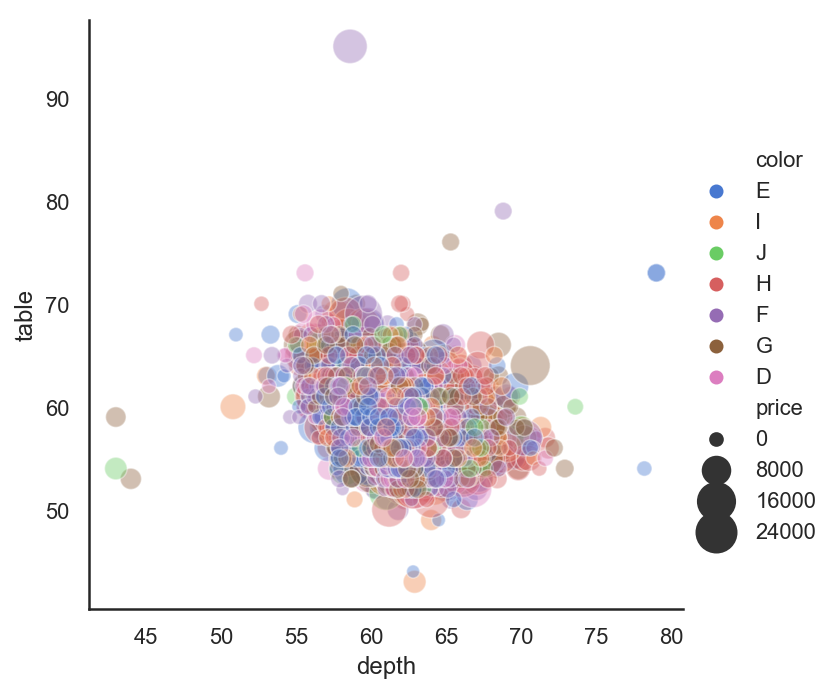

In [10]:
sns.set(style="white")
sns.relplot(x="depth", y="table", hue="color", size="price",
            sizes=(40, 400), alpha=.4, palette="muted", height=5,  data=diamonds)

- 따라서  1)의 가설대로 depth, table은 
price에 직접적인 영향이 없는 것으로 확인 

In [11]:
# x, y, z 의 0값 제거
diamonds[["x","y","z"]]=diamonds[["x","y","z"]].replace(0, np.NaN)
diamonds.dropna(inplace=True)
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


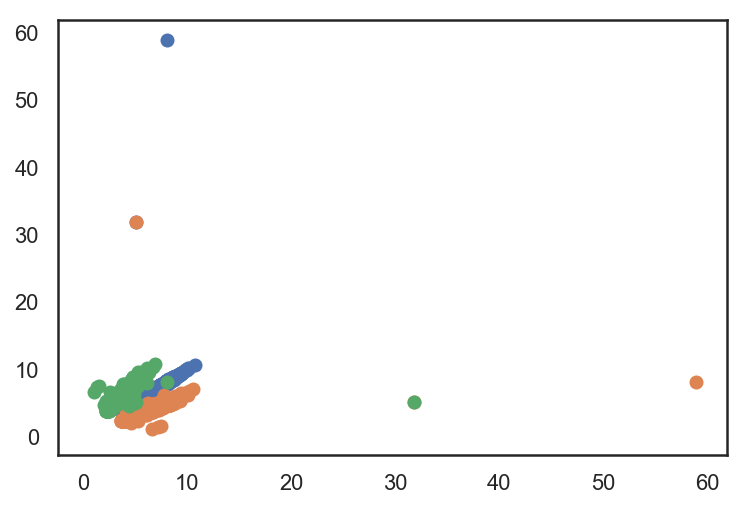

In [12]:
# x, y, z 관계 파악
plt.scatter("x", "y", data=diamonds)
plt.scatter("y", "z", data=diamonds)
plt.scatter("z", "x", data=diamonds)
plt.show()

In [13]:
# x의 이상치(최댓값) 확인 및 제거
diamonds.sort_values(by=["x"], ascending=False).head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31


In [14]:
# y의 이상치(최댓값) 확인 및 제거
diamonds.sort_values(by=["y"], ascending=False).head()

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17


In [15]:
diamonds.drop([24067, 49189], inplace=True)

In [16]:
# z의 이상치(최댓값) 확인 및 제거
diamonds.sort_values(by=["z"], ascending=False).head()

,carat,cut,color,clarity,depth,table,price,x,y,z
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38


In [17]:
diamonds.drop([48410], inplace=True)

In [ ]:
# z의 이상치(최솟값) 확인 및 제거
diamonds.sort_values(by=["z"], ascending=True).head()

,carat,cut,color,clarity,depth,table,price,x,y,z
14635,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07
21654,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,1.41
20694,1.53,Ideal,I,SI1,61.9,54.0,8971,7.43,7.50,1.53
39246,0.38,Ideal,E,VVS2,60.9,56.0,1068,4.71,4.68,2.06
31592,0.20,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24


In [ ]:
diamonds.drop([14635, 21654, 20694], inplace=True)

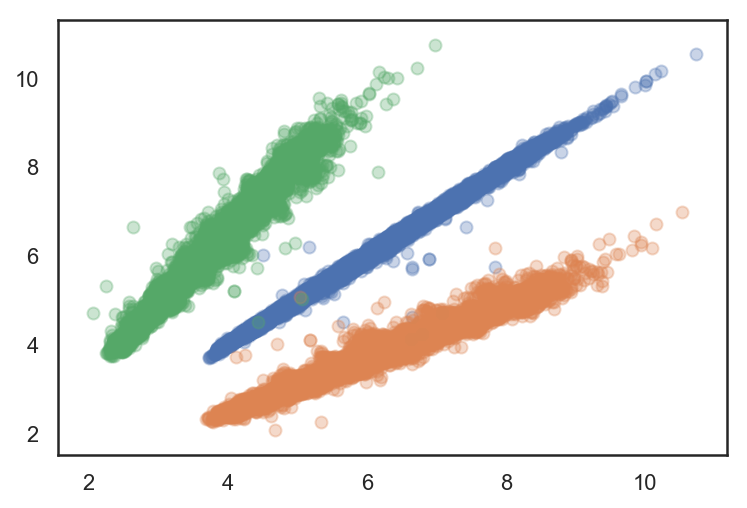

In [ ]:
plt.figure()
plt.scatter("x", "y",data=diamonds, alpha=0.3)
plt.scatter("y", "z",data=diamonds, alpha=0.3)
plt.scatter("z", "x",data=diamonds, alpha=0.3)
plt.show()

In [ ]:
# x, y, z의상관계수
np.corrcoef(diamonds["x"], diamonds["y"])[1,0], np.corrcoef(diamonds["z"], diamonds["y"])[1,0], np.corrcoef(diamonds["x"], diamonds["z"])[1,0]

(0.9986573258623497, 0.991276239547712, 0.9916189634791005)

In [ ]:
# x, y, z의 대체 column 생성
diamonds["volumn"]=diamonds["x"]*diamonds["y"]*diamonds["z"]
diamonds["mean_xyz"]=(diamonds["x"]+diamonds["y"]+diamonds["z"])/3

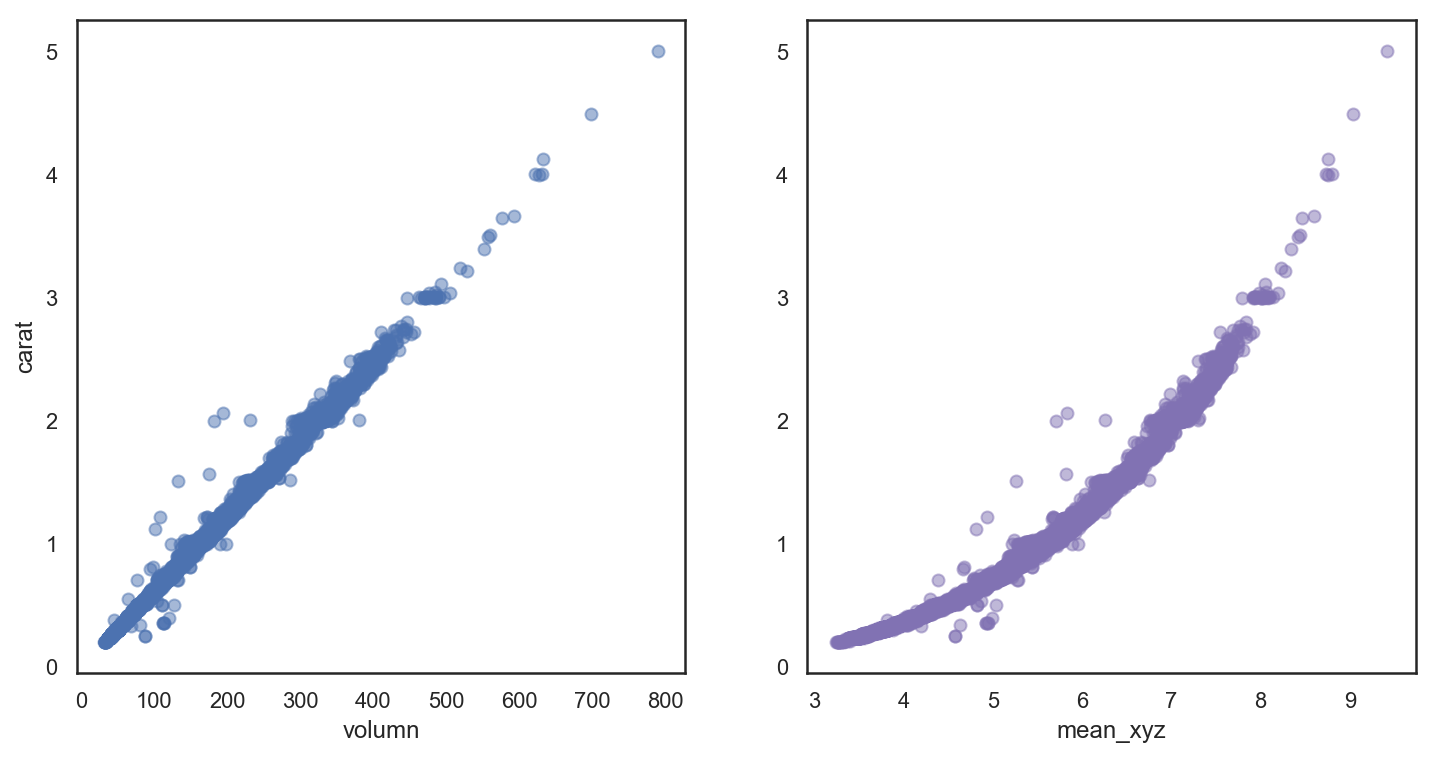

(0.9990462933542746, 0.9789467989971471)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter('volumn', "carat", data=diamonds, color="b", alpha=0.5)
plt.xlabel("volumn")
plt.ylabel("carat")

plt.subplot(122)
plt.scatter( 'mean_xyz', "carat", data=diamonds, color="m", alpha=0.5)
plt.xlabel("mean_xyz")

plt.show()

np.corrcoef(diamonds["volumn"], diamonds["carat"])[1,0],np.corrcoef(diamonds["mean_xyz"], diamonds["carat"])[1,0]

In [ ]:
# carat 과 price 상관계수
np.corrcoef(diamonds["carat"], diamonds["price"])[1,0]

0.9215806287337027

- 위의 상관관계로 보아  3), 4)의 가설대로 
x, y, z, carat은 price를 결정하는 요소임을 확인

 <br>

In [ ]:
plt.figure(figsize=(16, 8))
plt. subplot(121)
sns.lineplot(data = diamonds, x="mean_xyz", y="price")

plt.subplot(122)
sns.lineplot(data = diamonds, x="carat", y="price")
plt.show()

- mean_xyz와 carat 모두 일정 수준 이하까지는 정비례 양상을 보임
- 따라서 1)의 가설대로 다이아몬드 가격 분포에 있어 저가, 고가로 나눌 수 있음을 확인

### 2. Categorical Data 

In [ ]:
## carat의 크기 1.75를 기준으로 분류
c4= diamonds[["carat", "cut", "color", "clarity", "price"]]
b_carat = c4[c4["carat"]>1.75]
s_carat = c4[c4["carat"]<=1.75]
b_carat.shape, s_carat.shape

#### 2.1 cut

In [ ]:
colors = [ '#ff6666','#ffcc99', '#66b3ff', '#c2c2f0', '#99ff99']
colors_b = ['#ffcc99', '#ff6666', '#66b3ff', '#c2c2f0', '#99ff99']

plt.subplot(332)
diamonds.cut.value_counts().plot.pie(autopct='%.2f%%', radius=4, colors= colors)
plt.subplot(337)
s_carat.cut.value_counts().plot.pie(autopct='%.1f%%', radius=2.5, colors= colors)
plt.subplot(339)
b_carat.cut.value_counts().plot.pie(autopct='%.1f%%', radius=2.5, colors= colors_b)
plt.show()

In [ ]:
sns.barplot(x= "cut", y="price", data = b_carat, palette=("pastel"))
sns.barplot(x= "cut", y="price", data = s_carat)
plt.show()

#### 2.2 clarity

In [ ]:
colors = [ '#c2c2f0',  '#fec8d8', '#f9f9aa', '#66b3ff', '#ffcc99', '#776b3f', '#99ff99', '#ff6666' ]
colors_a = ['#f9f9aa', '#c2c2f0', '#fec8d8',  '#66b3ff', '#ff6666', '#ffcc99',  '#99ff99', '#776b3f' ]

plt.subplot(332)
diamonds.clarity.value_counts().plot.pie(autopct='%.2f%%', radius=2.5, colors=colors)
plt.subplot(337)
s_carat.clarity.value_counts().plot.pie(autopct='%.1f%%', radius=4, colors=colors )
plt.subplot(339)
b_carat.clarity.value_counts().plot.pie(autopct='%.1f%%', radius=4, colors=colors_a)
plt.show()

In [ ]:
plt.figure(figsize=(9, 6))
sns.barplot(x= "clarity", y="price", data = b_carat, palette=("pastel"))
sns.barplot(x= "clarity", y="price", data = s_carat)
plt.show()

#### 2.3 color

In [ ]:
colors = [ '#ff6666','#ffcc99', '#c2c2f0',  '#fec8d8', '#f9f9aa', '#66b3ff', '#99ff99']
colors_b = ['#66b3ff',  '#fec8d8', '#99ff99', '#ff6666','#c2c2f0', '#ffcc99', '#f9f9aa']

plt.subplot(232)
diamonds.color.value_counts().plot.pie(autopct='%.2f%%', radius=1.5, colors=colors)
plt.subplot(234)
s_carat.color.value_counts().plot.pie(autopct='%.1f%%', radius=2, colors=colors)
plt.subplot(236)
b_carat.color.value_counts().plot.pie(autopct='%.1f%%', radius=2, colors=colors_b)
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x= "color", y="price", data = b_carat,  palette=("pastel"))
sns.barplot(x= "color", y="price", data = s_carat)
plt.show()

### 3. 결론도출

- 1에서 세운 가설대로 작은 크기의 다이아몬드는 다른 column에 크게 영향을 받지 않는 것으로 결론
- 1.75 캐럿 이상의 다이아몬드(2360개)만 따로 분석

In [ ]:
# 1.75 캐럿 이상의 다이아몬드의 가격분포
plt.hist(b_carat["price"], bins=20)
plt.show()

In [ ]:
b_carat["count"]=1
pv = b_carat.pivot_table("count", ["color", "cut"], "clarity" , aggfunc=np.sum)

plt.figure(figsize=(10, 10))
sns.heatmap(pv, cmap='YlGnBu')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxenplot(data = b_carat.sort_values(by="color"), x="color", y="price", color ="r")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxenplot(data = b_carat, x="clarity", y="price", color ="b")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxenplot(data = b_carat.sort_values(by="cut"), x="cut", y="price", color ="g")
plt.show()

### category에 따른 관계 해석

- clarity 
    - IF, VVS1, VVS2 
        - 갯수 매우 적음
        - 주로 J color
        - IF > VVS1 > VVS2 순으로 고가 다이아몬드
    - I1 
        - color별 분포 다양
        - 비교적 저가 다이아몬드
- color
    - D :  평균가격은 높지 않지만 특정 clarity와 조합되는 경우 고가
    - J :  평균가격은 낮은 편이지만 고가의 clarity에 주로 분포
    - E, F : VS1, VS2에 해당하는 데이터 거의 없음
- cut 
    - Fair : 평균가격 낮음


In [ ]:
b_carat[(b_carat["clarity"]=="IF") & (b_carat["color"]=="J")]

앞의 최상/최하위 등급을 제외하고 
- clarity : SI1, SI2, VS1, VS2
- color : G, H, I
- cut : Premium, Very Good, Good, Ideal
만 재분석

In [ ]:
select_dia = b_carat.copy()
select_dia["clarity"]=select_dia["clarity"].replace(["IF","VVS1", "VVS2", "I1"], np.NaN)
select_dia["color"]=select_dia["color"].replace(["D","E","F","J"], np.NaN)
select_dia["cut"]=select_dia["cut"].replace("Fair", np.NaN)
select_dia.dropna(axis=0, inplace=True)

In [ ]:
sns.catplot(x= "color", y="price", hue="clarity", col="cut", col_wrap=2, kind="point", capsize=.2, data = select_dia)
plt.show()

### 최종 결론

###### 1.75 캐럿 미만의 다이아몬드라면 무조건 큰거!! 큰거!!!
- 캐럿은 x, y, z의 곱인 volumn과 유사 (실제로는 중량을 뜻함)
- 그리고 그 중에선 하얀거!! (color 등급 D, E, F 순으로..)

###### 1.75 캐럿 이상이라면
- color는 (D>E>F>)G>H>I>J 순 참고
- clarity(투명도)가 가장 결정적인 요소
- IF, VVS 등급이라면 좀 노랗더라도 비싼거
- VS1, VS2 는 color와 함께 고려 (취향 차이)
- SI1 > SI2
- I1 등급은 캐럿을 위해 모든 것을 포기한 경우

### 4. 선형회귀분석

#### 4.1 one hot encoding

In [ ]:
diamonds_ohe = pd.get_dummies(diamonds, prefix=['cut', 'color', 'clarity'])
diamonds_ohe.head()

####  4.2 Linear Regeression

In [ ]:
# 선형회귀 모델
from sklearn import linear_model
# 학습 데이터와 테스트 데이터를 나눠주는 모듈
from sklearn.model_selection import train_test_split
# 결과 데이터를 평가해주는 모듈
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# 데이터, 타겟 구분
dm_x = diamonds_ohe[["carat","depth","table","x","y","z",
                     "cut_Fair", "cut_Good", "cut_Very Good","cut_Premium","cut_Ideal", 
                     "color_D","color_E", "color_F","color_G", "color_H", "color_I","color_J", 
                     "clarity_I1", "clarity_IF", "clarity_SI1", "clarity_SI2", "clarity_VS1", "clarity_VS2", "clarity_VVS1", "clarity_VVS2"]]
dm_y = diamonds_ohe[["price"]]

x_train, x_test, y_train, y_test = train_test_split(dm_x, dm_y, test_size=0.3, random_state=1)

In [ ]:
# 객체 생성 / 모델 학습 / 결과 데이터 예측
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
predict_result = reg.predict(x_test)

In [ ]:
# 모델 평가
print("accuracy: "+ str(reg.score(x_test, y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test, predict_result)))
print("Mean squared error: {}".format(mean_squared_error(y_test, predict_result)))
R2 = r2_score(y_test, predict_result)
print('R Squared: {}'.format(R2))

n=x_test.shape[0]
p=x_test.shape[1] - 1
adjusted_r_squared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adjusted_r_squared))


# Thanks! :)